In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\netflix1.csv")
df.head(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
# data cleaning

In [7]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

In [11]:
df.dropna(subset=['director', 'country'],inplace=True)

In [13]:
df['date_added'] = pd.to_datetime(df['date_added'])

print(df['date_added'].dtypes)

datetime64[ns]


In [ ]:
# Exploratory data analysis (EDA)

C:\Users\user\AppData\Local\Temp\ipykernel_12052\2344773731.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = type_count.index,   y=type_count.values, palette='Set2')


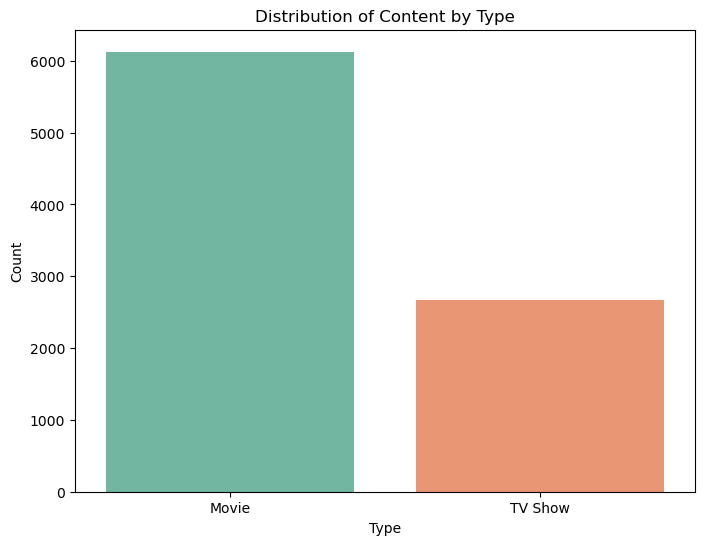

In [15]:
#1 content type distribution (Movies vs Tv shows)

type_count = df['type'].value_counts()

#plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x = type_count.index,   y=type_count.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [17]:
#2 most common Genres

#split the listed_in column and count genres
df['Genres'] = df['listed_in'].apply (lambda x: x.split(','))
all_genres = sum(df['Genres'],[])
genre_count = pd.Series(all_genres).value_counts().head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_12052\476897032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.values,  y=genre_count.index, palette='Set3')


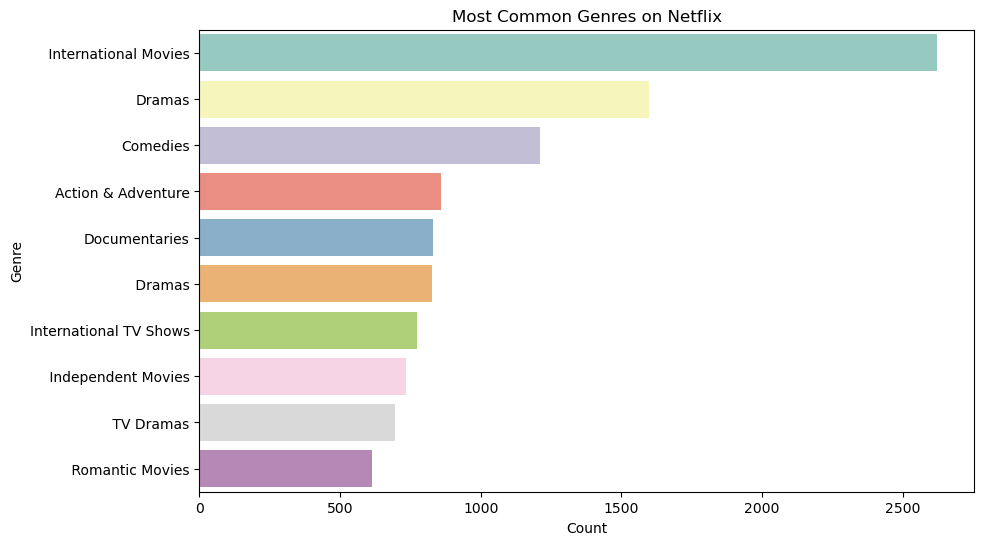

In [19]:
#plot the most common Genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_count.values,  y=genre_count.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [ ]:
#3. Content Added over time

In [21]:
# Extract year and month from date_added

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

C:\Users\user\AppData\Local\Temp\ipykernel_12052\285374976.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, palette='coolwarm')


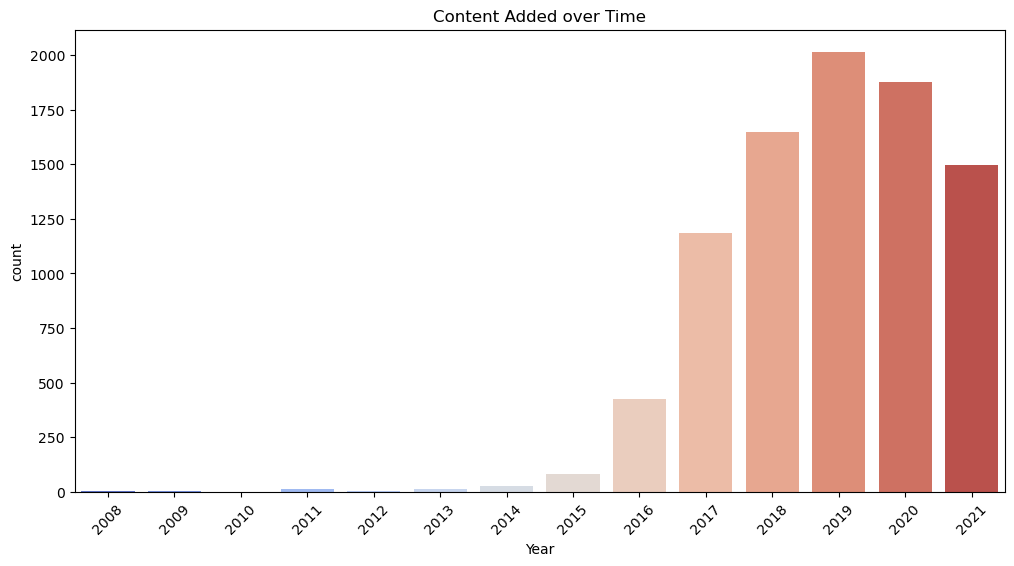

In [23]:
# plot content added over the years
plt.figure(figsize = (12, 6))
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title('Content Added over Time')
plt.xlabel('Year')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#4 Top 10 directors with the most Titles

In [25]:
#count title by directors

top_directors = df['director'].value_counts().head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_12052\3935680397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_directors.values, y = top_directors.index, palette='Blues_d')


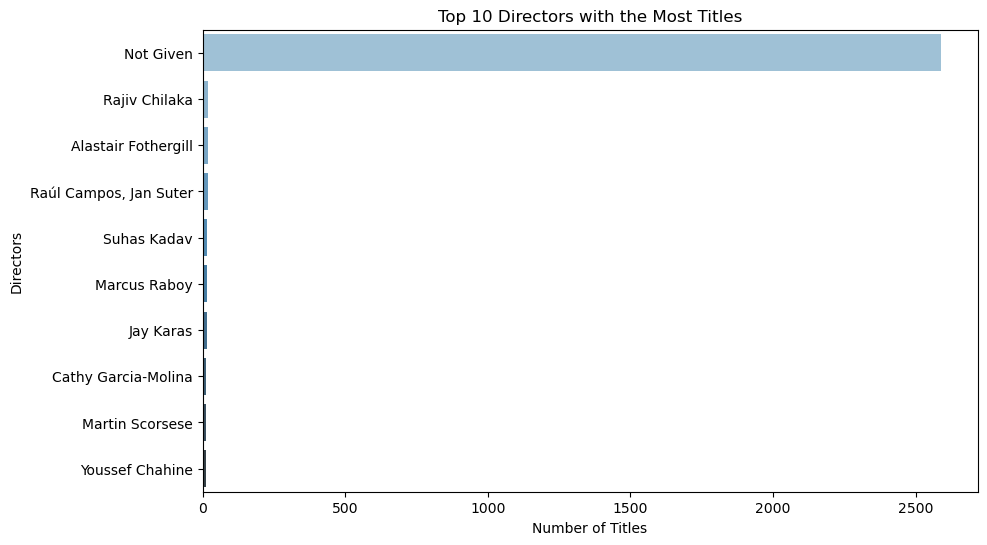

In [37]:
# plot top directors

plt.figure(figsize = (10, 6))
sns.barplot(x = top_directors.values, y = top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Directors')
plt.show()

In [ ]:
# Advanced visualization

Text(0.5, 0.98, 'Total Content on Netflix')

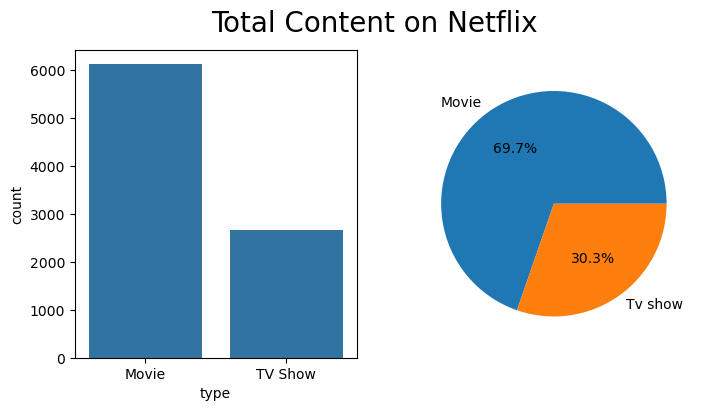

In [39]:
type_count
fig, axes=plt.subplots(1,2, figsize=(8, 4))

sns.countplot(df, x=df['type'], ax=axes[0])
plt.pie(type_count, labels=['Movie', 'Tv show'], autopct='%1.1f%%')

plt.suptitle('Total Content on Netflix', fontsize=20)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
 10  Genres        8790 non-null   object        
 11  year_added    8790 non-null   int32         
 12  month_added   8790 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(9)
memory usage: 824.2+ KB


In [41]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

Text(0.5, 0.98, 'Rating On Netflix')

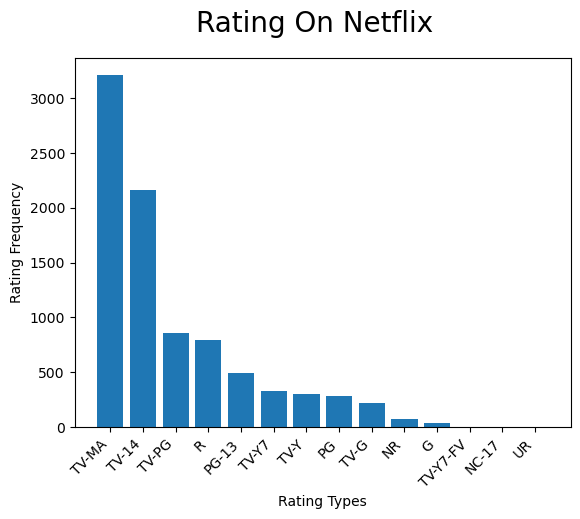

In [45]:
ratings = df['rating'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.bar(ratings['rating'], ratings['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Rating Types')
plt.ylabel('Rating Frequency')
plt.suptitle('Rating On Netflix', fontsize=20)

Text(0.5, 0.98, 'Rating on Netflix')

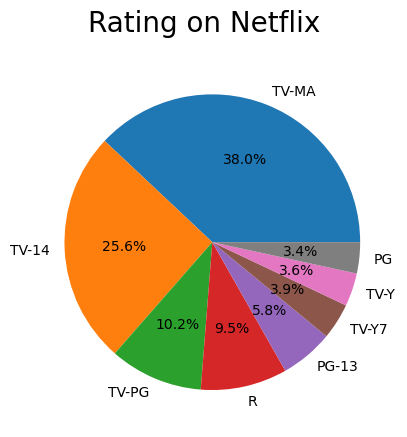

In [47]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8], autopct='%1.1f%%')
plt.suptitle('Rating on Netflix', fontsize=20)

In [49]:
df.describe()

,date_added,release_year,year_added,month_added
count,8790,8790.000000,8790.000000,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163,2018.873606,6.655859
min,2008-01-01 00:00:00,1925.000000,2008.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2018.000000,4.000000
50%,2019-07-03 00:00:00,2017.000000,2019.000000,7.000000
75%,2020-08-19 18:00:00,2019.000000,2020.000000,10.000000
max,2021-09-25 00:00:00,2021.000000,2021.000000,12.000000
std,NaN,8.825466,1.573568,3.436103


In [51]:
df['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

In [ ]:
# Top 10 countries with most content on Netflix

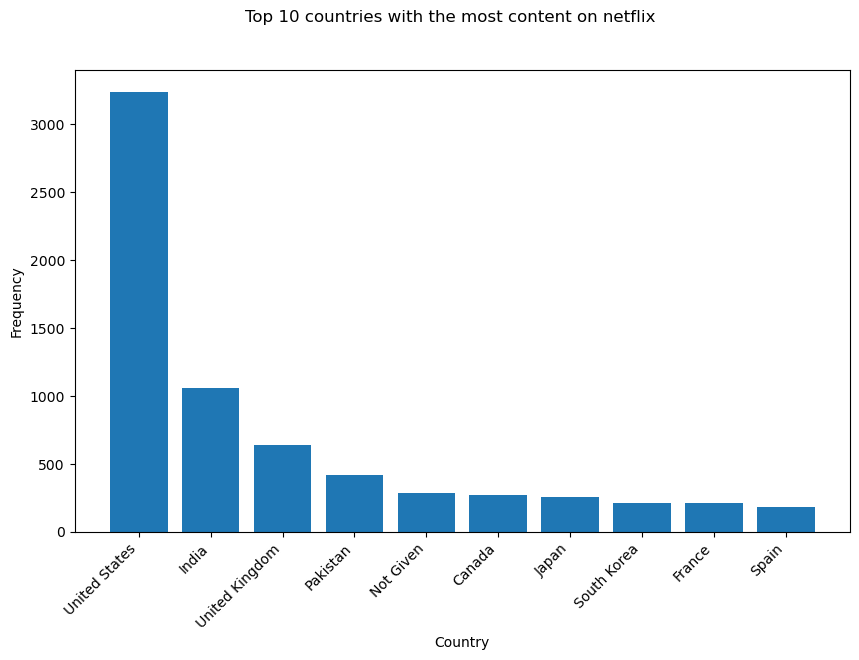

In [53]:
top_countries = df['country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]

plt.figure(figsize=(10, 6))
plt.bar(top_countries['country'],top_countries['count'])
plt.xticks(rotation=45 ,ha='right')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.suptitle('Top 10 countries with the most content on netflix')
plt.show()

In [ ]:
# yearly releases of movies and tv shows on netflix

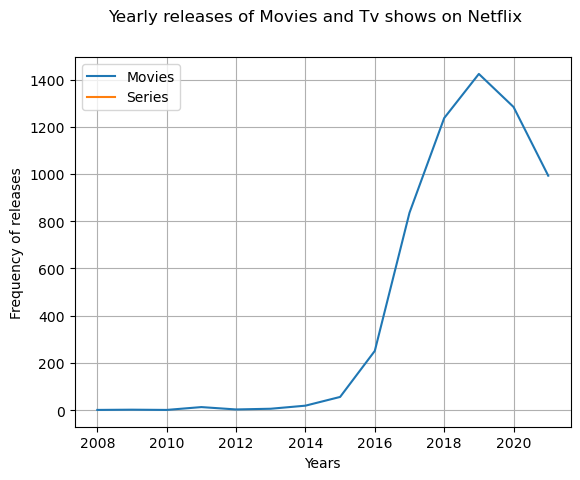

In [57]:
yearly_movie_release = df[df['type']=='Movie']['year_added'].value_counts().sort_index()
yearly_series_release = df[df['type']=='Tv_show']['year_added'].value_counts().sort_index()

plt.plot(yearly_movie_release.index, yearly_movie_release.values, label='Movies')
plt.plot(yearly_series_release.index, yearly_series_release.values, label='Series')
plt.xlabel('Years')
plt.ylabel('Frequency of releases')
plt.grid(True)
plt.suptitle('Yearly releases of Movies and Tv shows on Netflix')
plt.legend()
plt.show()

In [ ]:
# Top 10 popular movie genres

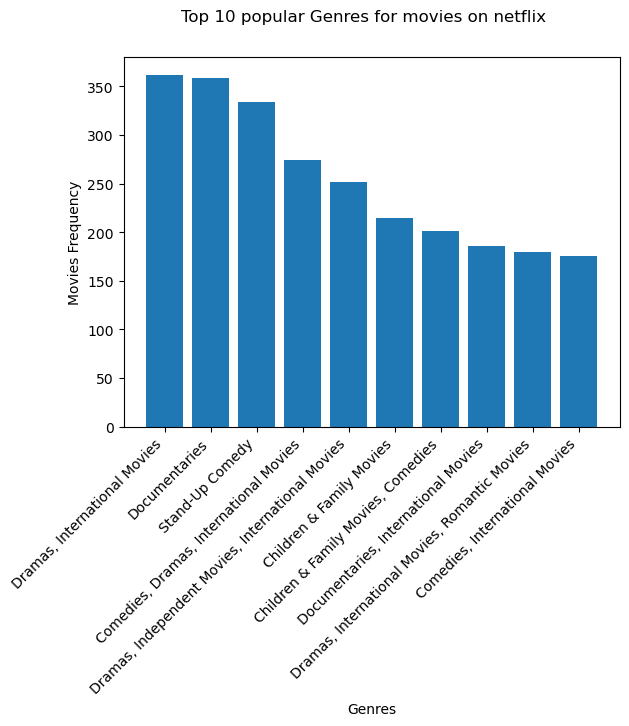

In [59]:
pop_movie = df[df['type']=='Movie'].groupby('listed_in').size().sort_values(ascending=False)[:10]
pop_series = df[df['type']=='Tv show'].groupby('listed_in').size().sort_values(ascending=False)[:10]

plt.bar(pop_movie.index, pop_movie.values)
plt.xticks(rotation=45,  ha='right')
plt.xlabel('Genres')
plt.ylabel('Movies Frequency')
plt.suptitle('Top 10 popular Genres for movies on netflix')
plt.show()

In [ ]:
# Top 10 directors across netflix with high frequency of movies and shows

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Suhas Kadav'),
  Text(4, 0, 'Marcus Raboy'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Martin Scorsese'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

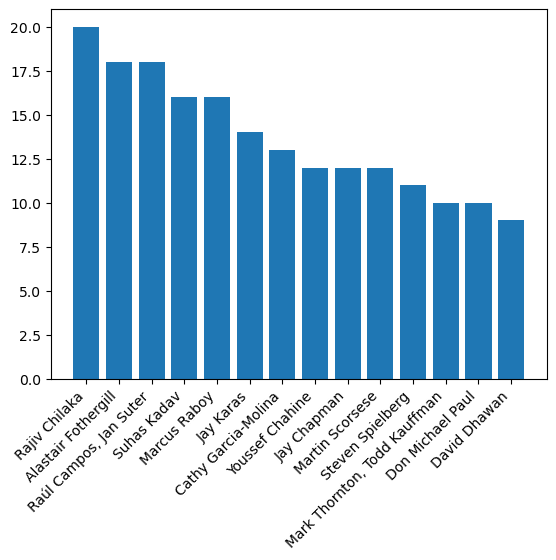

In [75]:
directors = df['director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]

plt.bar(directors['director'], directors['count'])
plt.xticks(rotation=45, ha='right')